In [340]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

In [341]:
df = pd.read_excel('/Users/shifadianisatrio/Desktop/DS Bootcamp/Module 2/Module 2_Projects/Supermarket Customers.xlsx', sheet_name= 'Supermarket Customers')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [342]:
### Data Cleaning
## Check for duplicates in ID
duplicates = df['ID'].duplicated()
print(df[duplicates])

# Tidak ada duplicate rows 

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


In [343]:
## Data formatting (jika diperlukan)
## Check data types per columnn, apakah ada data dalam kolom yang terisi dengan lebih dari satu data type?
df.info()

# Semua data type di masing-masing kolom sudah sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [344]:
## See unique values for categorical variables
print("Education:", df['Education'].unique())
print("Marital_Status:", df['Marital_Status'].unique())

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [345]:
count = df['Education'].value_counts()['2n Cycle']
print("count_2n_cycle:", count)

count_2n_cycle: 203


In [346]:
df['Education'] = df['Education'].replace('2n Cycle', 'Master')
# Value '2n Cycle' di replace dengan 'Master' karena artinya sama (menurut Google)

In [347]:
count = df['Marital_Status'].value_counts()['YOLO']
print("count_YOLO:", count)

df = df[df['Marital_Status'] != 'YOLO']
# Delete semua baris dengan value 'YOLO', karena YOLO bukan marital status yang valid dan frekuensi value tersebut hanya muncul 2 kali 
# (tidak akan terlalu ngefek data set secara total jika baris-baris tersebut di delete)

count_YOLO: 2


In [348]:
count_YOLO = (df['Marital_Status'] == 'YOLO').sum()

In [349]:
count = df['Marital_Status'].value_counts()['Absurd']
print("count_Absurd:", count)

df = df[df['Marital_Status'] != 'Absurd']
# Delete semua baris dengan value 'Absurd', karena Absurd bukan marital status yang valid dan frekuensi value tersebut hanya muncul 2 kali 

count_Absurd: 2


In [350]:
count_Absurd = (df['Marital_Status'] == 'Absurd').sum()

In [351]:
# Change 'Alone' to 'Single'
# They mean the same thing
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

In [352]:
# See unique values in columns AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, and Response
# Jika setidaknya ada nilai selain 0 atau 1 di dalam kolom-kolom tersebut, sebaiknya delete seluruh baris tempat nilai tersebut berada, 
# karena variabel-variabel tersebut adalah variabel binary yang hanya bisa ditempati nilai 0 atau 1

columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for col in columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")

# Semua unique values sudah sesuai

Unique values in AcceptedCmp1:
[0 1]


Unique values in AcceptedCmp2:
[0 1]


Unique values in AcceptedCmp3:
[0 1]


Unique values in AcceptedCmp4:
[0 1]


Unique values in AcceptedCmp5:
[0 1]


Unique values in Response:
[1 0]




In [353]:
## Check missing values
missing_values = df.isna().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


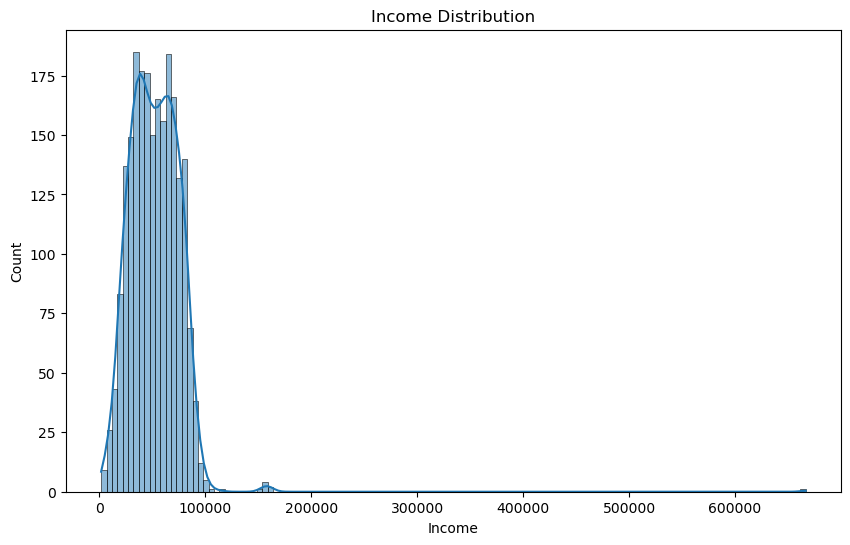

In [354]:
# Missing values in variable 'Income'; Check for normal distribution in column 'Income' before dealing with missing values
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

# Variable'Income' tidak terdistribusi normal, tetapi terdistribusi bimodal dan skew ke kanan

In [355]:
# Check for outliers in column 'Income' before dealing with missing values
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]  # Remove outliers in column 'Income'
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values:\n{outliers['Income'].to_string()}")

df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)].copy()

# Variable 'Income' tidak terdistribusi normal 
# 8 outliers sudah di remove, sudah tidak ada outliers
# Karena distribusi 'Income' tidak terdistribusi normal, missing values akan di insert dengan median dari 'Income'

Number of outliers: 8
Outlier values:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0


In [356]:
# Replace all missing values in the column 'Income' with the median value
income_median = df['Income'].median()
df['Income'].fillna(income_median, inplace=True)

In [357]:
# Check for outliers in all columns (except categorical, binary variables, date, ID)
exclude_indices = [0, 1, 2, 3] + list(range(20, 29))
columns_to_check = [col for i, col in enumerate(df.columns) if i not in exclude_indices]

for col in columns_to_check:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nColumn: {col}")
        print(f"Number of outliers: {len(outliers)}")
        print(f"Outlier values: {outliers[col].unique()}")

# Walaupun ada berberapa outlier values, tidak ada yang perlu di delete karena data nya masih masuk akal
# Data dalam masing-masing variabel tersebut diakumulasikan selama dua tahun
# jadi data-data konsumen yang termasuk outliers mungkin saja konsumen yang sering belanja di supermarket jauh lebih sering dari yang rata-rata


Column: Income
Number of outliers: 0
Outlier values: []

Column: Kidhome
Number of outliers: 0
Outlier values: []

Column: Teenhome
Number of outliers: 0
Outlier values: []

Column: Recency
Number of outliers: 0
Outlier values: []

Column: MntWines
Number of outliers: 34
Outlier values: [1332 1349 1241 1285 1248 1239 1396 1288 1379 1478 1492 1279 1308 1253
 1394 1296 1315 1298 1302 1449 1259 1252 1459 1493 1324 1462 1276 1245
 1486 1311]

Column: MntFruits
Number of outliers: 245
Outlier values: [ 88  80 100 164 120 107 111 105 172  81 106 194 115  99  90 133 162 189
 138  86 114 153 134 148  84 129  98 183 147 144 104  91 163 152 137 190
  96  83  92 155 151  85 127 103  89 181 112 159 102 123 166 142 178  93
  97 168 174 122 199 101 117 108 130 161 124 126 185  87 197  82 184 160
 140 131 132 169 193 149 143 154]

Column: MntMeatProducts
Number of outliers: 171
Outlier values: [1725  801  780  925  779  568  690  812  951  590  921  756  813  740
  757  768  565  573  561  570  562 

In [358]:
# Delete data with birth year 1893

df = df[df['Year_Birth'] != 1893]

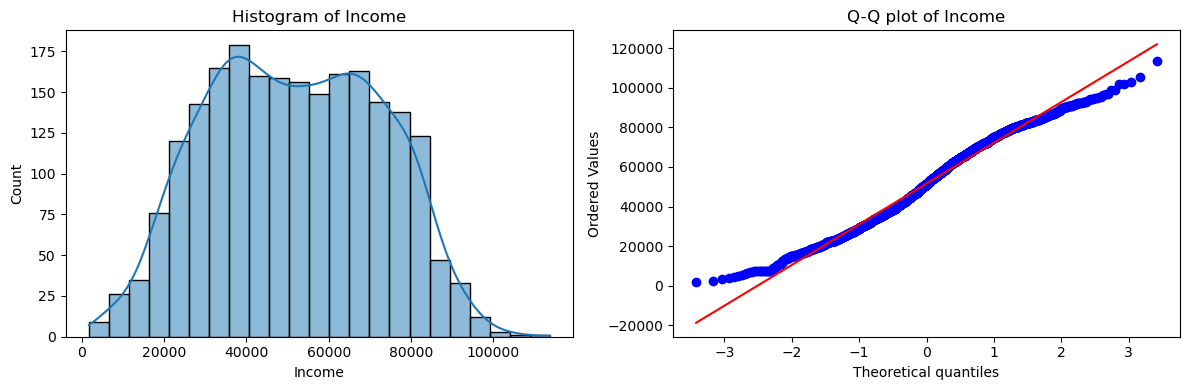

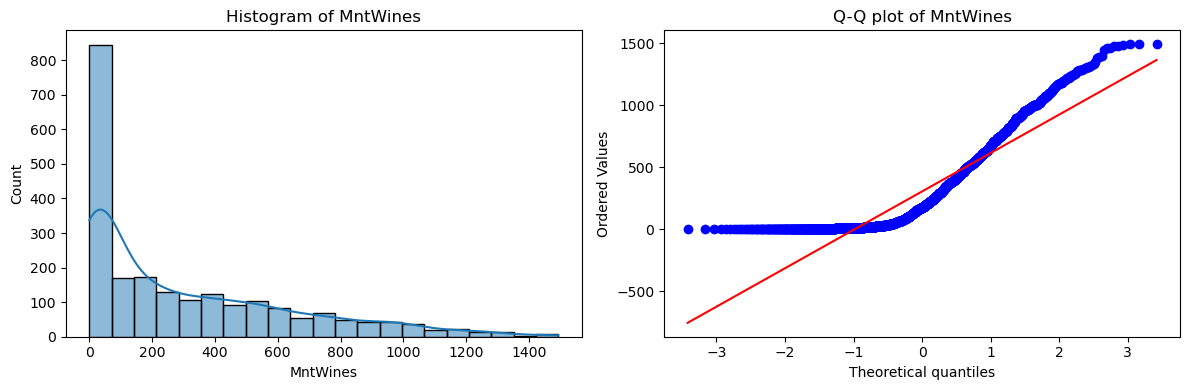

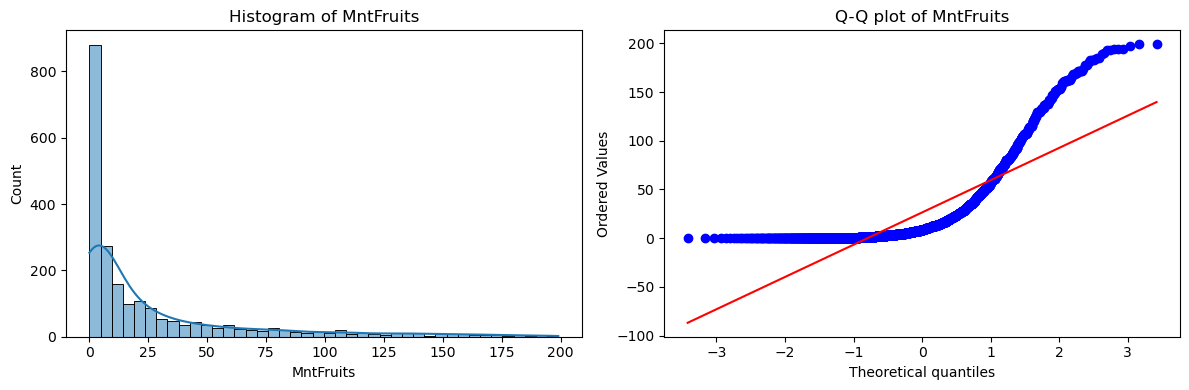

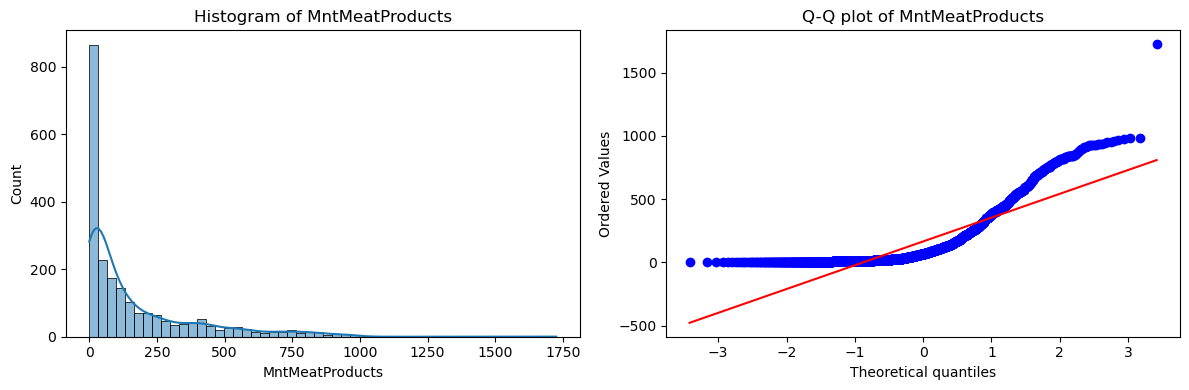

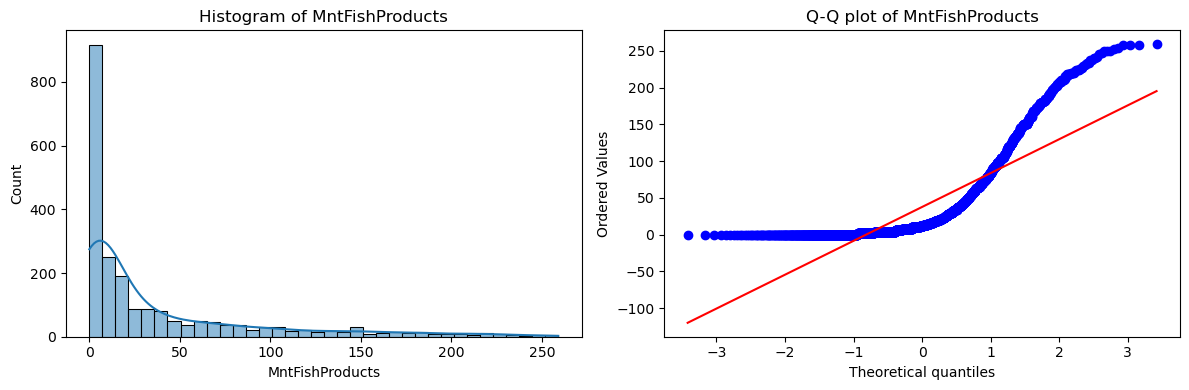

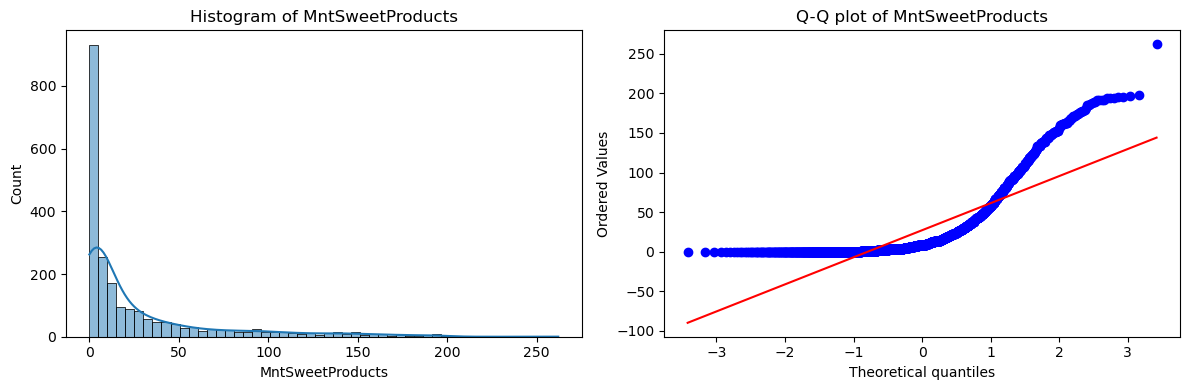

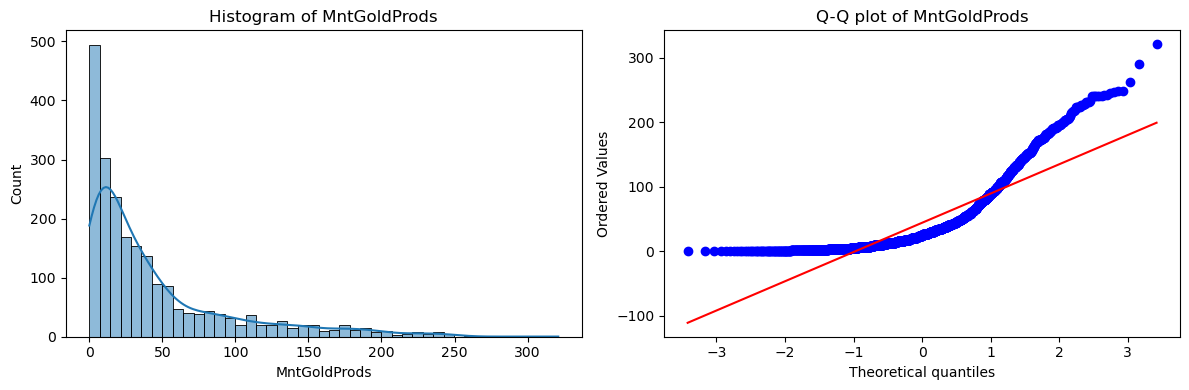

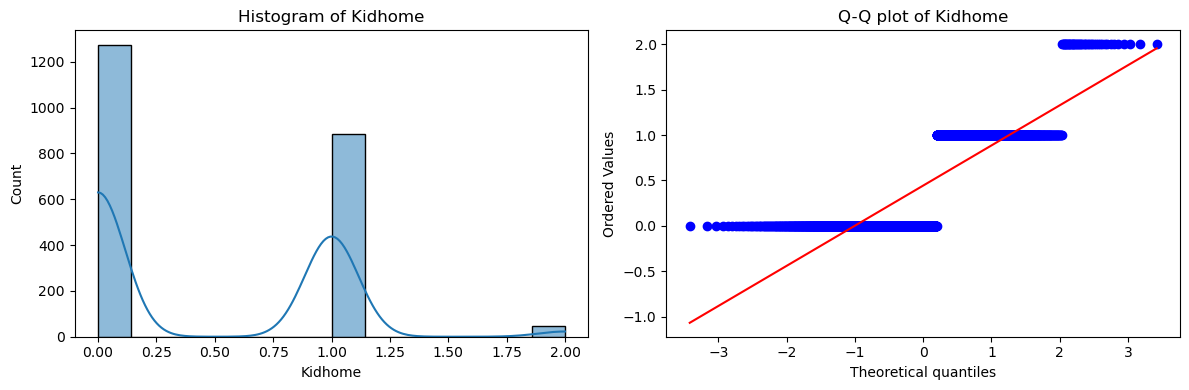

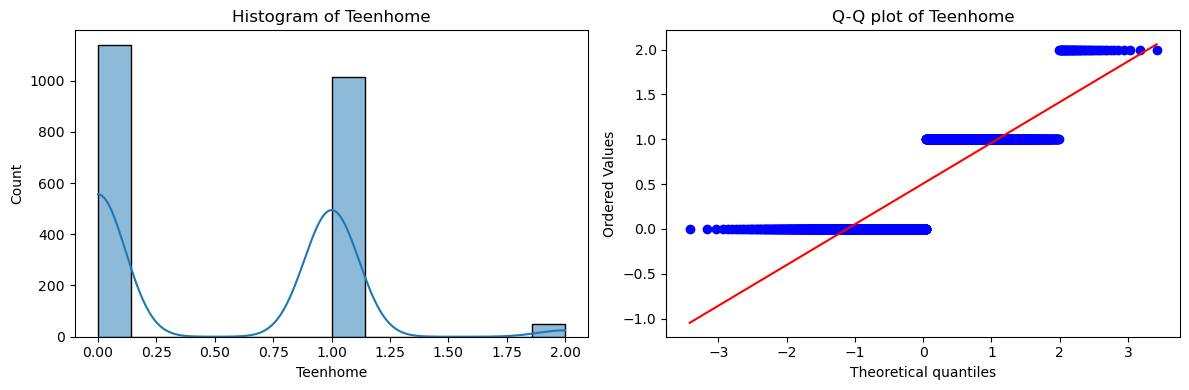

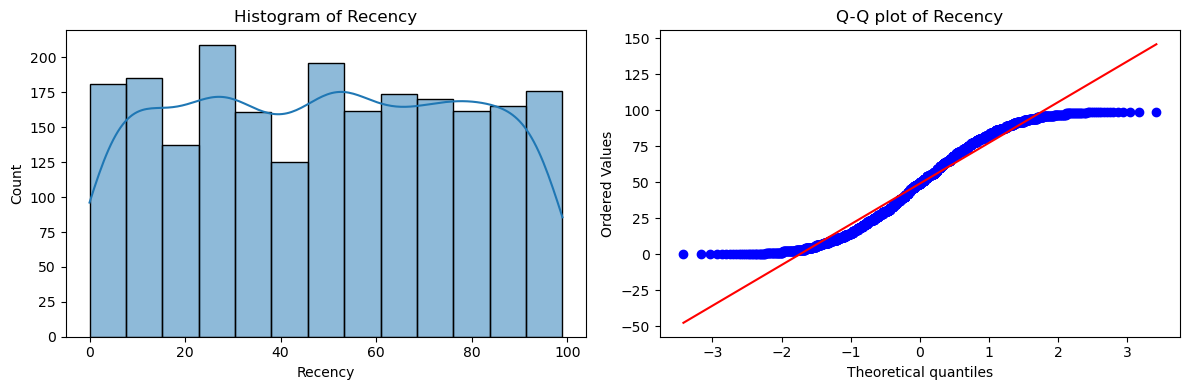

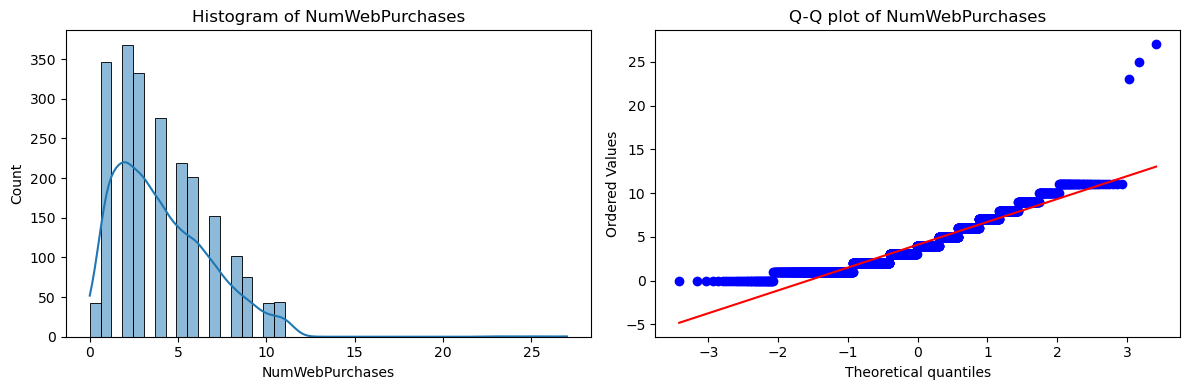

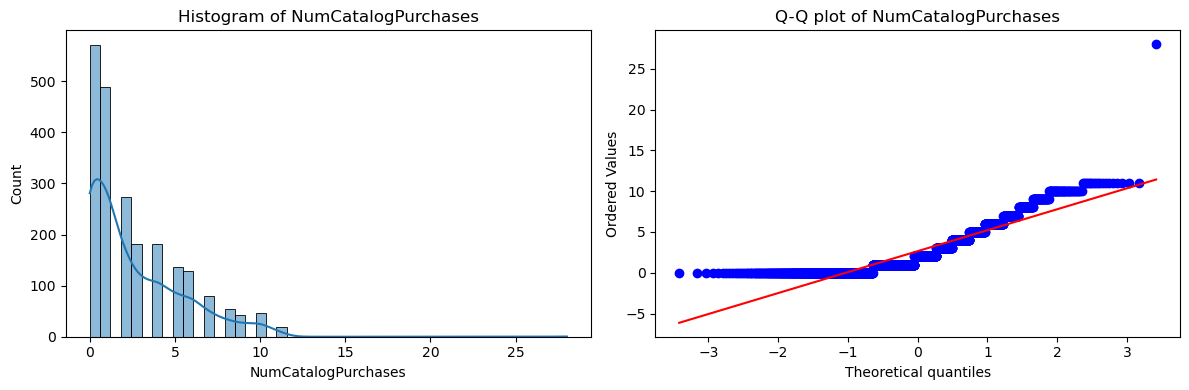

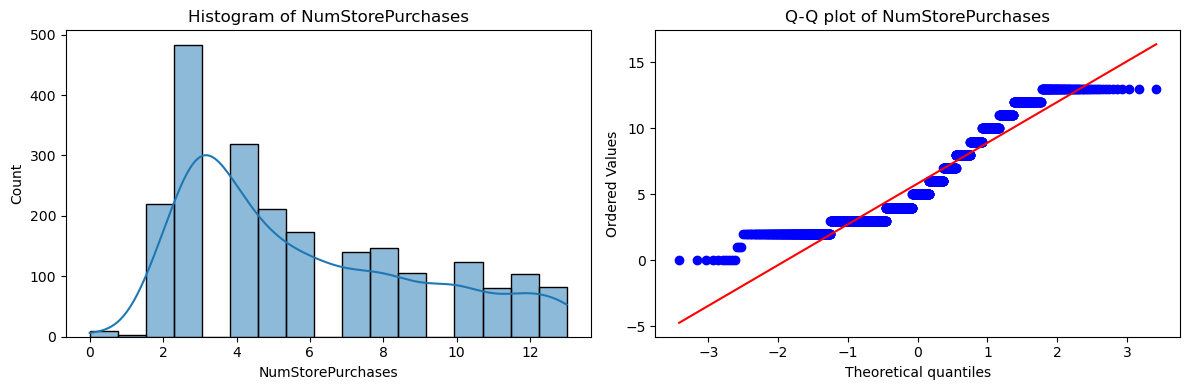

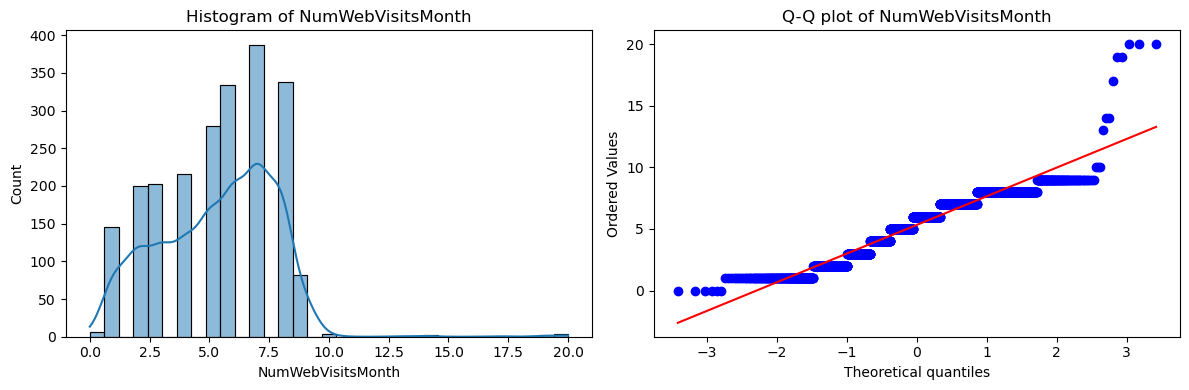

In [359]:
# Checking whether the following variables are normally distributed (excluding categorical variables, binary variables, ID, date and time)
# For each column, create a histogram and Q-Q plot
def plot_distribution(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram with density curve
    sns.histplot(df[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    
    # Q-Q plot
    from scipy import stats
    stats.probplot(df[column], plot=axes[1])
    axes[1].set_title(f'Q-Q plot of {column}')
    
    plt.tight_layout()
    plt.show()

# Apply to all your columns
columns_to_check = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for col in columns_to_check:
    plot_distribution(df, col)

# Dari grafik-grafik tersebut, bisa dilihat bahwa walaupun ada berberapa yang tidak normal, tetapi distribusinya masi masuk akal jika memahamikan arti dari masing-masing variablenya
# misalnya, biasanya tidak banyak konsumen yang beli buah sampai totalnya menuju 200 dollar dalam 2 tahun
# karena itu, outliers di variable-variable tersebut tidak usah di hapus/ganti value

In [360]:
# Sort all data based on date of customer's enrollment with the company (supaya lebih enak untuk dilihat)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.sort_values(by='Dt_Customer', ascending=False, inplace=True)

In [361]:
# Position Dt_Customer to second column (supaya lebih enak untuk dilihat)
cols = df.columns.tolist()

cols.remove('Dt_Customer')
cols.insert(1, 'Dt_Customer')

df = df[cols]

In [362]:
# View most recent and oldest date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

latest_date = df['Dt_Customer'].max()
print(f"Most recent date: {latest_date}")

oldest_date = df['Dt_Customer'].min()
print(f"Oldest date: {oldest_date}")

Most recent date: 2014-06-29 00:00:00
Oldest date: 2012-07-30 00:00:00


In [363]:
# Rearrange columns (supaya urutannya berberapa kolom lebih teratur)
column_position_map = {
    'AcceptedCmp1': 20,
    'AcceptedCmp2': 21,
    'AcceptedCmp3': 22,
    'AcceptedCmp4': 23,
    'AcceptedCmp5': 24,
    'Response': 25,
    'Complain': 26
}

current_columns = df.columns.tolist()

columns_to_move = list(column_position_map.keys())
remaining_columns = [col for col in current_columns if col not in columns_to_move]

for col, pos in sorted(column_position_map.items(), key=lambda x: x[1]):
    remaining_columns.insert(pos, col)

df = df[remaining_columns]

In [364]:
df.head()
### Data - Clean Version

,ID,Dt_Customer,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue
200,7300,2014-06-29,1952,Graduation,Divorced,69142.0,0,1,50,448,...,5,0,0,0,1,0,0,0,3,11
989,453,2014-06-29,1956,PhD,Widow,35340.0,1,1,1,27,...,5,0,0,0,0,0,0,0,3,11
45,1371,2014-06-28,1976,Graduation,Single,79941.0,0,0,72,123,...,1,0,0,0,0,0,0,0,3,11
1812,8093,2014-06-28,1969,Master,Married,79734.0,0,0,72,572,...,1,1,0,0,0,0,0,0,3,11
796,6722,2014-06-28,1954,PhD,Married,70421.0,0,1,98,479,...,6,0,0,0,0,0,0,0,3,11


In [365]:
### Descriptive Statistics

excluded_columns = [0, 1, 3, 4] + list(range(20, 29))  # 20-28
stats = df.drop(df.columns[excluded_columns], axis=1).describe()
print(stats)

## Analysis: Semua sudah kelihatan normal

        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2203.000000    2203.000000  2203.000000  2203.000000  2203.000000   
mean   1968.832047   51613.842941     0.443032     0.506128    49.064004   
std      11.881795   20725.393575     0.537259     0.544424    28.932271   
min    1899.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35187.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51287.000000     0.000000     0.000000    49.000000   
75%    1977.000000   68298.500000     1.000000     1.000000    74.000000   
max    1996.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2203.000000  2203.000000      2203.000000      2203.000000   
mean    306.177031    26.415797       165.391739        37.650931   
std     337.817963    39.835545       217.927007        54.628306   
min       0.000000     0.000000        

In [366]:
### Total purchases per channel
## Tidak bisa membandingkan menggunakan mean value, karena tiga-tiga distribusinya tidak normal

purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

total_purchases = df[purchase_columns].sum()
print(total_purchases)

## Analysis: Purchase lewat store lebih unggul dibandingkan purchase lewat web dan catalog

NumWebPurchases         9027
NumCatalogPurchases     5823
NumStorePurchases      12822
dtype: int64


In [367]:
### Comparison between channels in total number of purchases
## Apakah ada perbedaan yang signifikan antara purchasing channel tersebut?
## Kruskal-Wallis test 

from scipy.stats import kruskal
columns_to_compare = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data = [df[col] for col in columns_to_compare]

statistic, p_value = kruskal(*data)

print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Result: Significant differences exist between at least two groups (reject H0).")
else:
    print("Result: No significant differences found (fail to reject H0).")

## Analysis: Ada perbedaan yang signifikan antara dua purchasing channel atau lebih

Kruskal-Wallis Statistic: 1244.926511933196
P-value: 4.6520325647278526e-271
Result: Significant differences exist between at least two groups (reject H0).


In [368]:
### Comparison between means: total number of purchases in each channel
## Dunn Test 
!pip install scikit-posthocs
import scikit_posthocs as sp

columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
data = [df[col] for col in columns]

statistic, p_value = kruskal(*data)
print(f"Kruskal-Wallis p-value: {p_value:.4f}")

if p_value >= 0.05:
    print("Stopping: No significant differences found (no need for post-hoc).")
else:
    print("Proceeding with Dunn's test...")

stacked_data = pd.DataFrame({
    'Values': pd.concat(data),
    'Groups': [col for col in columns for _ in range(len(df))]
})

dunn_results = sp.posthoc_dunn(
    stacked_data,
    val_col='Values',
    group_col='Groups',
    p_adjust='bonferroni'  
)
print("\nDunn's Post-Hoc Test Results (p-values):")
print(dunn_results)

## Analysis: Ada perbedaan yang signifikan antara tiga-tiga channel tersebut
## Meskipun di era digital, web purchases tidak se unggul store purchases

Kruskal-Wallis p-value: 0.0000
Proceeding with Dunn's test...

Dunn's Post-Hoc Test Results (p-values):
                     NumCatalogPurchases  NumStorePurchases  NumWebPurchases
NumCatalogPurchases         1.000000e+00      8.037257e-272     1.783669e-78
NumStorePurchases          8.037257e-272       1.000000e+00     2.762834e-60
NumWebPurchases             1.783669e-78       2.762834e-60     1.000000e+00


,Web,Catalog,Store
Generation,,,
Boomers,446.6,323.2,639.9
Gen_Others,640.0,464.0,704.0
Gen_X,403.3,228.7,556.8
Millennial,339.7,234.1,529.9


<Figure size 1000x600 with 0 Axes>

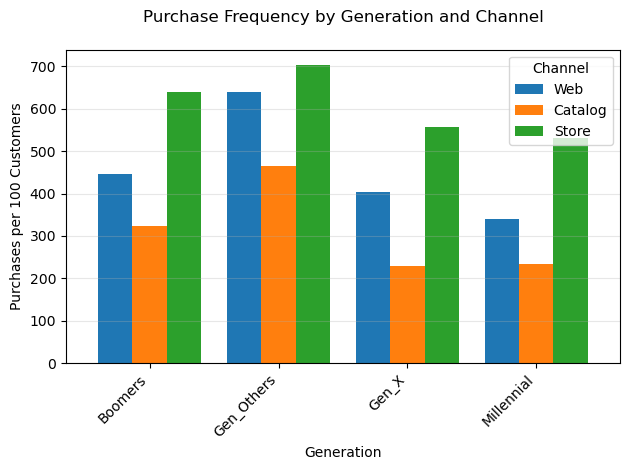

In [369]:
### Crosstabs: Channel - Demographic
def assign_generation(birth_year):
    if pd.isna(birth_year):
        return 'Unknown'
    birth_year = int(birth_year)
    if 1981 <= birth_year <= 1996:
        return 'Millennial'
    elif 1965 <= birth_year <= 1980:
        return 'Gen_X'
    elif 1946 <= birth_year <= 1964:
        return 'Boomers'
    else:
        return 'Gen_Others'

df['Generation'] = df['Year_Birth'].apply(assign_generation)

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_names = ['Web', 'Catalog', 'Store'] 

total_purchases = df.groupby('Generation')[purchase_cols].sum()

total_customers = df['Generation'].value_counts()

purchases_per_100 = (total_purchases.div(total_customers, axis=0) * 100).round(1)

purchases_per_100.columns = channel_names

styled_table = purchases_per_100.style\
    .format("{:.1f}")\
    .set_caption("Average Number of Purchases per 100 Customers by Generation and Channel")\
    .background_gradient(cmap='Blues', axis=1)\
    .set_table_styles([
        {'selector': 'caption', 
         'props': [('font-size', '16px'), ('font-weight', 'bold'), 
                   ('text-align', 'center'), ('margin-bottom', '15px')]},
        {'selector': 'th', 
         'props': [('text-align', 'center')]}
    ])

display(styled_table)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
purchases_per_100.plot(kind='bar', stacked=False, width=0.8)
plt.title('Purchase Frequency by Generation and Channel', pad=20)
plt.ylabel('Purchases per 100 Customers')
plt.xlabel('Generation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Channel')
plt.tight_layout()
plt.show()

## Analysis: Channel yang paling unggul per generasi
# Millenials: Store
# Gen_X: Store
# Boomers: Store
# Gen_Others: Store

# Naikin investment ke dalam web purchases (karena tren online shopping sedang naik)
# Special target: generasi yang sangat tua
# Tidak banyak yang menggunakan catalog (across generations)

In [370]:
### Crosstabs: Channel - Education
education_mapping = {
    '2n Cycle': 'Master',
    'Graduation': 'Graduation',
    'Master': 'Master',
    'PhD': 'PhD',
    'Basic': 'Basic'
}

df['Education'] = df['Education'].map(education_mapping).fillna('Basic')

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_names = ['Web', 'Catalog', 'Store']  

total_purchases = df.groupby('Education')[purchase_cols].sum()

total_customers = df['Education'].value_counts()

purchases_per_customer = (total_purchases.div(total_customers, axis=0)).round(2)

purchases_per_customer.columns = channel_names

education_order = ['Basic', 'Graduation', 'Master', 'PhD']
purchases_per_customer = purchases_per_customer.loc[education_order]

styled_table = purchases_per_customer.style\
    .format("{:.2f}")\
    .set_caption("Average Number of Purchases per Customer by Education Level and Channel")\
    .background_gradient(cmap='Blues', axis=1)\
    .set_table_styles([
        {'selector': 'caption', 
         'props': [('font-size', '16px'), ('font-weight', 'bold'), 
                   ('text-align', 'center'), ('margin-bottom', '15px')]},
        {'selector': 'th', 
         'props': [('text-align', 'center')]}
    ])

display(styled_table)

## Analysis: Channel yang paling unggul per level edukasi 
# Basic: Store
# Graduation: Store
# Master: Store
# PhD: Store

# Store: Graduation
# Web: PhD
# Catalog: PhD

# Support argumen: tidak banyak yang menggunaka catalog (across demographics, education)
# store: 47% (of total users)
# web: 33% (of total users)
# catalog: 20% (of total users)

,Web,Catalog,Store
Education,,,
Basic,1.89,0.48,2.85
Graduation,4.12,2.71,5.85
Master,3.95,2.48,5.79
PhD,4.46,2.92,6.12


,Web Purchases,Catalog Purchases,Store Purchases
Marital_Status,,,
Single,3.86,2.63,5.67
Divorced,4.33,2.68,5.84
Widow,4.62,3.30,6.36
Together,4.12,2.65,5.79
Married,4.10,2.58,5.87


<Figure size 1200x600 with 0 Axes>

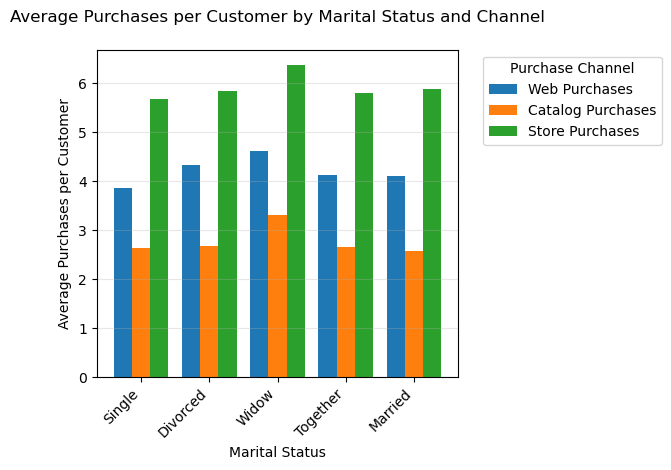

In [371]:
### Crosstabs: Channel - Marital Status
marital_status_mapping = {
    'Married': 'Married',
    'Together': 'Together',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Single': 'Single',
}

df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping).fillna('Single')

purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_names = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total_purchases = df.groupby('Marital_Status')[purchase_cols].sum()

total_customers = df['Marital_Status'].value_counts()

purchases_per_customer = (total_purchases.div(total_customers, axis=0)).round(2)

purchases_per_customer.columns = channel_names

marital_order = ['Single','Divorced', 'Widow', 'Together', 'Married']
purchases_per_customer = purchases_per_customer.loc[marital_order]

styled_table = purchases_per_customer.style\
    .format("{:.2f}")\
    .set_caption("Average Number of Purchases per Customer by Marital Status and Channel")\
    .background_gradient(cmap='Blues', axis=1)\
    .set_table_styles([
        {'selector': 'caption', 
         'props': [('font-size', '16px'), ('font-weight', 'bold'), 
                   ('text-align', 'center'), ('margin-bottom', '15px')]},
        {'selector': 'th', 
         'props': [('text-align', 'center')]}
    ])

display(styled_table)

plt.figure(figsize=(12, 6))
purchases_per_customer.plot(kind='bar', width=0.8)
plt.title('Average Purchases per Customer by Marital Status and Channel', pad=20)
plt.ylabel('Average Purchases per Customer')
plt.xlabel('Marital Status')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Purchase Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analysis: 
# Konsumen yang tidak berpasangan (Single, Divorced, Widow) lebih sering menggunakan Store
# Rata-rata konsumen yang berpasangan (Together, Married) lebih sering menggunakan web dibandingkan konsumen yang tidak berpasangan => bisa target group ini untuk investasi web

In [372]:
### Create new column: Income group
conditions = [
    (df['Income'] <= 30000),
    (df['Income'] > 30000) & (df['Income'] <= 58020),
    (df['Income'] > 58020) & (df['Income'] <= 94000),
    (df['Income'] > 94000) & (df['Income'] <= 153000),
    (df['Income'] > 153000)
]

groups = ['Lower', 'LowerMiddle', 'Middle', 'UpperMiddle', 'Upper']

df['Income_Group'] = np.select(conditions, groups, default='Unknown')

print(df[['Income', 'Income_Group']].head())
print("\nValue counts:")
print(df['Income_Group'].value_counts().sort_index())

       Income Income_Group
200   69142.0       Middle
989   35340.0  LowerMiddle
45    79941.0       Middle
1812  79734.0       Middle
796   70421.0       Middle

Value counts:
Income_Group
Lower          370
LowerMiddle    943
Middle         873
UpperMiddle     17
Name: count, dtype: int64


Spending Proportions by Generation and Product Category (% of total spending per generation):
            Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
Generation                                                             
Boomers      53.2     3.9          25.8           5.9            4.1   
Gen_Others   52.1     5.0          27.8           6.9            4.0   
Gen_X        50.2     4.5          26.8           6.2            4.7   
Millennial   44.2     4.9          31.7           7.0            4.9   

            GoldProds  
Generation             
Boomers           7.0  
Gen_Others        4.3  
Gen_X             7.5  
Millennial        7.3  


<Figure size 1200x600 with 0 Axes>

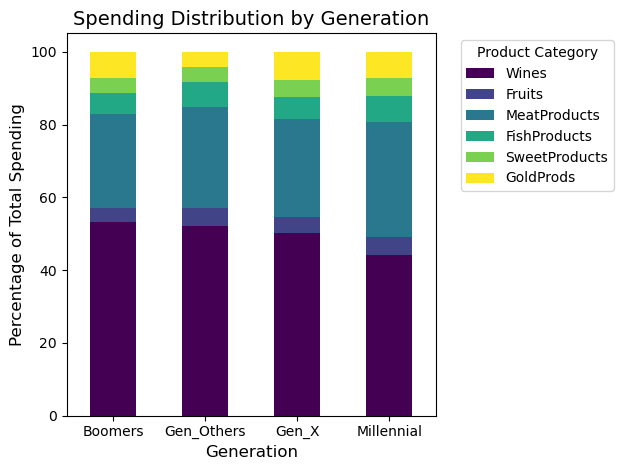

In [378]:
### Crosstab: Product category - Demographic
def assign_generation(year):
    if year >= 1981 and year <= 1996:
        return 'Millennial'
    elif year >= 1965 and year <= 1980:
        return 'Gen_X'
    elif year >= 1946 and year <= 1964:
        return 'Boomers'
    else:
        return 'Gen_Others'

df['Generation'] = df['Year_Birth'].apply(assign_generation)

spending_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]

category_names = [col.replace('Mnt', '') for col in spending_cols]

total_spending = df.groupby('Generation')[spending_cols].sum()

proportion_crosstab = total_spending.div(total_spending.sum(axis=1), axis=0) * 100
proportion_crosstab.columns = category_names
proportion_crosstab = proportion_crosstab.round(1)

print("Spending Proportions by Generation and Product Category (% of total spending per generation):")
print(proportion_crosstab)

plt.figure(figsize=(12, 6))
proportion_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Spending Distribution by Generation', fontsize=14)
plt.ylabel('Percentage of Total Spending', fontsize=12)
plt.xlabel('Generation', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Analysis (generasi yang paling banyak pengeluarannya dalam masing-masing product category):
# Wine: Boomers
# Fruits: Gen_Others
# Meat: Millenial
# Fish: Millenial
# Sweet: Millenial
# Gold: Gen_X

In [376]:
### Crosstab: Product category - Education
df['Education'] = df['Education'].str.capitalize()
education_mapping = {
    'Basic': 'Basic',
    '2n cycle': 'Graduation',  
    'Graduation': 'Graduation',
    'Master': 'Master',
    'Phd': 'PhD'
}
df['Education'] = df['Education'].map(education_mapping).fillna(df['Education'])

spending_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]

category_names = [col.replace('Mnt', '') for col in spending_cols]

total_spending = df.groupby('Education')[spending_cols].sum()

proportion_crosstab = total_spending.div(total_spending.sum(axis=1), axis=0) * 100

proportion_crosstab.columns = category_names

proportion_crosstab = proportion_crosstab.round(1)

education_order = ['Basic', 'Graduation', 'Master', 'PhD']
proportion_crosstab = proportion_crosstab.loc[education_order]

print("Spending Proportions by Education Level and Product Category (% of total spending per education level):")
print(proportion_crosstab)

## Analysis:
# Wine: PhD (unggul sekali)
# Fruits: Basic
# Meat: Graduation
# Fish: Basic
# Sweet: Basic
# Gold: Basic

Spending Proportions by Education Level and Product Category (% of total spending per education level):
            Wines  Fruits  MeatProducts  FishProducts  SweetProducts  \
Education                                                              
Basic         8.9    13.6          14.0          20.9           14.8   
Graduation   46.0     5.0          28.9           7.0            5.0   
Master       50.4     4.2          26.8           6.5            4.5   
PhD          60.7     3.0          24.4           4.0            3.0   

            GoldProds  
Education              
Basic            27.9  
Graduation        8.2  
Master            7.5  
PhD               4.8  


In [377]:
### Crosstab: Product category - Marital status
marital_status_mapping = {
    'Married': 'Married',
    'Together': 'Together',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Single': 'Single',
}

df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping).fillna(df['Marital_Status'])

spending_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]

category_names = [col.replace('Mnt', '') for col in spending_cols]

total_spending = df.groupby('Marital_Status')[spending_cols].sum()

proportion_crosstab = total_spending.div(total_spending.sum(axis=1), axis=0) * 100

proportion_crosstab.columns = category_names

proportion_crosstab = proportion_crosstab.round(1)

marital_order = ['Married', 'Together', 'Divorced', 'Widow', 'Single', 'Alone']
proportion_crosstab = proportion_crosstab.loc[marital_order]

print("Spending Proportions by Marital Status and Product Category (% of total spending per marital status):")
print(proportion_crosstab)

## Analysis:
# Wine: Divorced, Married
# Fruits: Divorced, MArried, Widow
# Meat: Single
# Fish: Widow
# Sweet: Widow
# Gold: Widow

KeyError: "['Alone'] not in index"

In [ ]:
### Crosstab: Product category - Income 
bins = [0, 30000, 58020, 94000, 153000, np.inf]
labels = ['Lower', 'LowerMiddle', 'Middle', 'UpperMiddle', 'Upper']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=True)

spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

total_spending = df.groupby('Income_Group')[spending_cols].sum()

proportional_spending = total_spending.div(total_spending.sum(axis=1), axis=0) * 100

proportional_spending = proportional_spending.round(2)

print("Proportional Spending by Income Group (% of total spending per income group):")
print(proportional_spending)

## Analysis:
# Wine: LowerMiddle
# Fruits: Lower
# Meat: UpperMiddle
# Fish: Lower
# Sweet: Lower
# Gold: Lower

Proportional Spending by Income Group (% of total spending per income group):
              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Income_Group                                                          
Lower            19.09       7.96            29.73            11.10   
LowerMiddle      56.80       3.47            19.72             5.37   
Middle           49.76       4.52            28.99             6.28   
UpperMiddle      46.98       3.15            31.94             6.65   
Upper              NaN        NaN              NaN              NaN   

              MntSweetProducts  MntGoldProds  
Income_Group                                  
Lower                     8.57         23.54  
LowerMiddle               3.54         11.10  
Middle                    4.57          5.89  
UpperMiddle               5.96          5.32  
Upper                      NaN           NaN  


In [254]:
### Product category - Income - Demographic
income_bins = [0, 30000, 58020, 94000, 153000, np.inf]
income_labels = ['Lower', 'LowerMiddle', 'Middle', 'UpperMiddle', 'Upper']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=True)

def assign_generation(year):
    if 1981 <= year <= 1996:
        return 'Millennial'
    elif 1965 <= year <= 1980:
        return 'Gen_X'
    elif 1946 <= year <= 1964:
        return 'Boomers'
    else:
        return 'Gen_Others'

df['Generation'] = df['Year_Birth'].apply(assign_generation)

purchase_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

grouped = df.groupby(['Income_Group', 'Generation'])[purchase_cols].sum()

proportional_purchases = grouped.div(grouped.sum(axis=1), axis=0) * 100

proportional_purchases = proportional_purchases.round(1)

crosstab_result = proportional_purchases.unstack(level='Generation')

print("Proportional Purchases by Product Category, Income Group, and Generation (% of row total):")
print(crosstab_result)

## Analysis:
# Wine:lowerMiddle Boomers & LowerMiddle Gen_Others
# Fruits: Lower Gen_X 
# Meat: UpperMiddle Boomers
# Fish: Lower Gen_X
# Sweet: UpperMiddle Gen_Others
# Gold: Lower Millenial

Proportional Purchases by Product Category, Income Group, and Generation (% of row total):
             MntWines                             MntFruits                   \
Generation    Boomers Gen_Others Gen_X Millennial   Boomers Gen_Others Gen_X   
Income_Group                                                                   
Lower            21.5        NaN  17.3       20.7       6.8        NaN   7.2   
LowerMiddle      62.0       62.8  56.1       42.2       2.9        3.0   3.5   
Middle           51.6       50.1  49.7       45.5       4.2        5.5   4.7   
UpperMiddle      48.9        2.2  43.8       49.1       2.1        0.7   5.6   
Upper             NaN        NaN   NaN        NaN       NaN        NaN   NaN   

                        MntMeatProducts             ... MntFishProducts  \
Generation   Millennial         Boomers Gen_Others  ...           Gen_X   
Income_Group                                        ...                   
Lower               9.9            25.1    

In [255]:
### Crosstab: Website visit - Demographic
def assign_generation(year):
    if 1981 <= year <= 1996:
        return 'Millennial'
    elif 1965 <= year <= 1980:
        return 'Gen_X'
    elif 1946 <= year <= 1964:
        return 'Boomers'
    else:
        return 'Gen_Others'

df['Generation'] = df['Year_Birth'].apply(assign_generation)

visit_bins = [0, 1, 3, 5, 7, np.inf]
visit_labels = ['0-1', '2-3', '4-5', '6-7', '8+']
df['WebVisits_Category'] = pd.cut(df['NumWebVisitsMonth'], bins=visit_bins, labels=visit_labels)

crosstab = pd.crosstab(
    index=df['Generation'],
    columns=df['WebVisits_Category'],
    normalize='index'  
) * 100

formatted_crosstab = crosstab.round(1).astype(str) + '%'

print("Proportion of Web Visits in Last Month by Generation:")
print(formatted_crosstab)

## Analysis:
# Millenials use the web the most last month, followed by Gen_X then Boomers

Proportion of Web Visits in Last Month by Generation:
WebVisits_Category    0-1    2-3    4-5    6-7     8+
Generation                                           
Boomers              8.5%  21.9%  26.1%  29.6%  13.9%
Gen_Others          20.0%  36.0%  20.0%  20.0%   4.0%
Gen_X                4.0%  15.4%  22.7%  36.2%  21.7%
Millennial           9.5%  18.3%  15.1%  30.7%  26.5%


In [256]:
### Total no. of complaint - Product category
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
               'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['Primary_Category'] = df[product_cols].idxmax(axis=1)

complaint_crosstab = pd.crosstab(
    index=df['Primary_Category'],
    columns='Total_Complaints',
    values=df['Complain'],
    aggfunc='sum'  
)

complaint_crosstab = complaint_crosstab.rename(columns={'Primary_Category': 'Product Category'})
complaint_crosstab = complaint_crosstab.sort_values('Total_Complaints', ascending=False)

print("Total Complaints by Product Category:")
print(complaint_crosstab)

## Analysis: 
# Complain datang dari konsumen yang membeli produk-produk tersebut. Tetapi, kita tidak dapat memastikan bahwa complain tersebut datang dari produk tersebut, 
# bisa jadi dari purchasing channel nya
# Kami dari pihak analisis menyarankan bahwa untuk perusahaan mengambil data kategorikal mengenai asal complain konsumen

Total Complaints by Product Category:
col_0             Total_Complaints
Primary_Category                  
MntWines                        11
MntMeatProducts                  5
MntGoldProds                     3
MntFishProducts                  1
MntSweetProducts                 1
MntFruits                        0


In [257]:
### Total np. of complaint - Channel
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Primary_Channel'] = df[channel_cols].idxmax(axis=1)

df['Primary_Channel'] = df['Primary_Channel'].str.replace('Num', '').str.replace('Purchases', '')

complaint_crosstab = pd.crosstab(
    index=df['Primary_Channel'],
    columns='Total_Complaints',
    values=df['Complain'],
    aggfunc='sum'  
)

complaint_crosstab = complaint_crosstab.sort_values('Total_Complaints', ascending=False)

print("Total Complaints by Primary Purchasing Channel:")
print(complaint_crosstab)

## Analysis:
# Most complaints came from store purchases, followed by web purchases

Total Complaints by Primary Purchasing Channel:
col_0            Total_Complaints
Primary_Channel                  
Store                          13
Web                             8
Catalog                         0


Optimization terminated successfully.
         Current function value: 0.053750
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               Complain   No. Observations:                 2203
Model:                          Logit   Df Residuals:                     2201
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                0.001699
Time:                        20:01:09   Log-Likelihood:                -118.41
converged:                       True   LL-Null:                       -118.61
Covariance Type:            nonrobust   LLR p-value:                    0.5256
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8898      0.460    -10.634      0.000      -5.791      -3.989
Recency        0.0048      0.

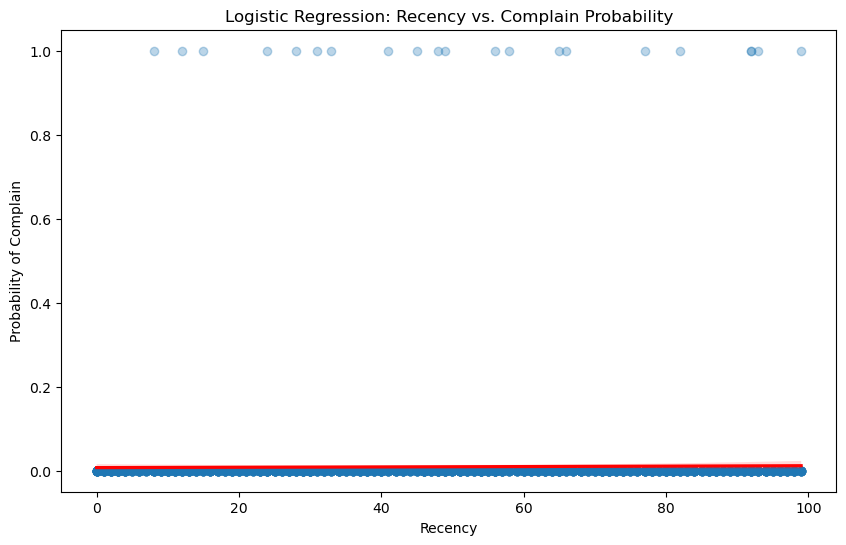

In [259]:
### Logistic regression: How recent the consumers have visited the supermarket with proability of a complaint 
import statsmodels.api as sm

X = df['Recency']  
y = df['Complain'] 

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

plt.figure(figsize=(10, 6))
sns.regplot(x='Recency', y='Complain', data=df, logistic=True, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Logistic Regression: Recency vs. Complain Probability')
plt.ylabel('Probability of Complain')
plt.show()

## Analysis
# The probability of complaint is not significantly affected by recency (karena yang complain tidak sebanyak adanya data konsumen juga sih)

In [260]:
### Crosstab: No. of deals purchased - Income
bins = [-np.inf, 30000, 58020, 94000, 153000, np.inf]
labels = ['Lower', 'LowerMiddle', 'Middle', 'UpperMiddle', 'Upper']

df['IncomeGroup'] = pd.cut(df['Income'], bins=bins, labels=labels)

crosstab_result = pd.crosstab(
    index=df['IncomeGroup'],
    columns='Total Deals Purchased',
    values=df['NumDealsPurchases'],
    aggfunc='sum'
).fillna(0)  

print(crosstab_result)

## Analysis:
# LowerMiddle & Middle class purchased the most deals

col_0        Total Deals Purchased
IncomeGroup                       
Lower                          774
LowerMiddle                   2609
Middle                        1710
UpperMiddle                      7
Upper                            0


In [299]:
df.to_excel("output.xlsx", index=False)

In [300]:
oldest_date = df['Dt_Customer'].min()
print("Oldest date in Dt_Customer:", oldest_date)

Oldest date in Dt_Customer: 2012-07-30 00:00:00
